# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


In [19]:
print(weather_api_key)


9a1b9f4208d6947bb27d738463de76b3


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(city_weather["dt"]))

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labasa
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | acajutla
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | ta`u
Processing Record 6 of Set 1 | taoudenni
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | richards bay
Processing Record 13 of Set 1 | khor
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | st. john's
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | sosnovo-ozerskoye
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | dunke

In [32]:
city_weather = (requests.get(f"{url}appid={weather_api_key}&q=iqaluit")).json()
city_weather
# city_weather["coord"]["lat"]

{'coord': {'lon': -68.5145, 'lat': 63.7506},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 277.98,
  'feels_like': 273.97,
  'temp_min': 277.98,
  'temp_max': 278,
  'pressure': 1029,
  'humidity': 75,
  'sea_level': 1029,
  'grnd_level': 1023},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 160},
 'clouds': {'all': 20},
 'dt': 1726956087,
 'sys': {'type': 2,
  'id': 47658,
  'country': 'CA',
  'sunrise': 1726913743,
  'sunset': 1726958296},
 'timezone': -14400,
 'id': 5983720,
 'name': 'Iqaluit',
 'cod': 200}

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labasa,-16.4167,179.3833,301.51,66,37,2.46,FJ,2024-09-21 17:08:39
1,port-aux-francais,-49.3500,70.2167,274.84,65,77,16.10,TF,2024-09-21 17:08:40
2,acajutla,13.5928,-89.8275,299.98,80,95,1.15,SV,2024-09-21 17:08:41
3,udachny,66.4167,112.4000,269.47,90,71,1.05,RU,2024-09-21 17:08:42
4,ta`u,-14.2336,-169.5144,299.98,82,29,7.90,AS,2024-09-21 17:08:43


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labasa,-16.4167,179.3833,301.51,66,37,2.46,FJ,2024-09-21 17:08:39
1,port-aux-francais,-49.3500,70.2167,274.84,65,77,16.10,TF,2024-09-21 17:08:40
2,acajutla,13.5928,-89.8275,299.98,80,95,1.15,SV,2024-09-21 17:08:41
3,udachny,66.4167,112.4000,269.47,90,71,1.05,RU,2024-09-21 17:08:42
4,ta`u,-14.2336,-169.5144,299.98,82,29,7.90,AS,2024-09-21 17:08:43


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

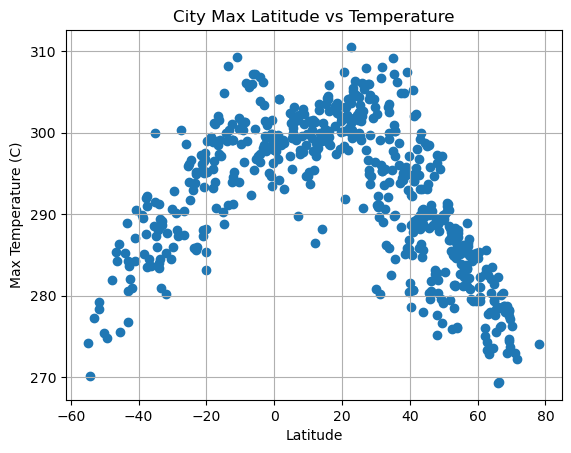

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

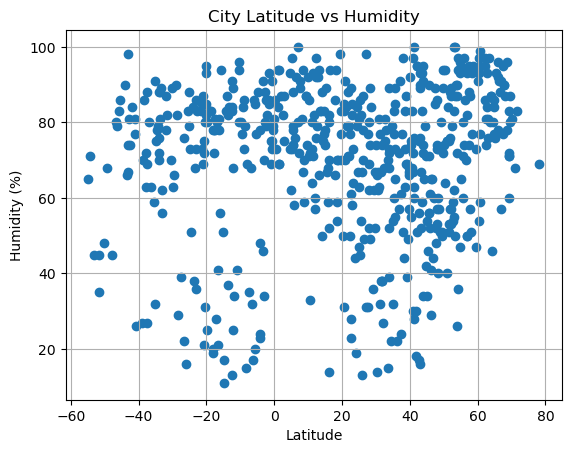

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

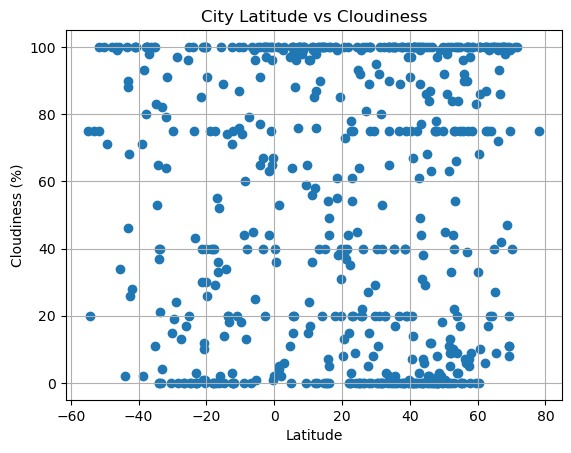

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

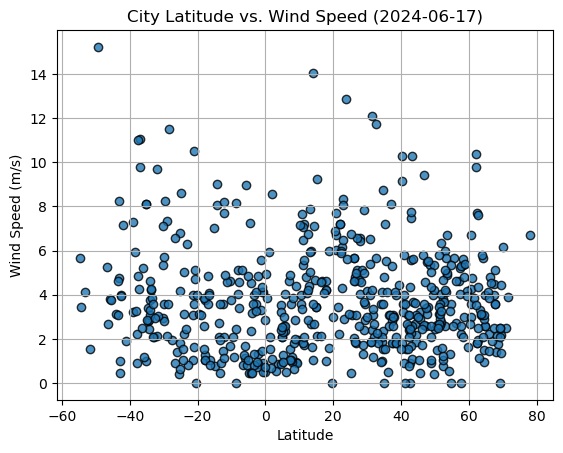

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y): 
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    predicted_values = slope * x + intercept
    
    # Create the plot
    plt.scatter(x, y)
    plt.plot(x, predicted_values, color='red')
    
    # Annotate the line equation and R-squared value
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line_eq, (min(x), max(predicted_values) - 20), fontsize=12, color='red')
    print(f'The r^2-value is: {rvalue**2:.2f}')
 

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,acajutla,13.5928,-89.8275,299.98,80,95,1.15,SV,2024-09-21 17:08:41
3,udachny,66.4167,112.4000,269.47,90,71,1.05,RU,2024-09-21 17:08:42
5,taoudenni,22.6783,-3.9836,310.52,24,34,3.67,ML,2024-09-21 17:08:44
9,bilibino,68.0546,166.4372,278.00,81,98,0.72,RU,2024-09-21 17:08:49
12,khor,47.8861,134.9464,277.61,73,0,2.34,RU,2024-09-21 17:08:52


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labasa,-16.4167,179.3833,301.51,66,37,2.46,FJ,2024-09-21 17:08:39
1,port-aux-francais,-49.3500,70.2167,274.84,65,77,16.10,TF,2024-09-21 17:08:40
4,ta`u,-14.2336,-169.5144,299.98,82,29,7.90,AS,2024-09-21 17:08:43
6,adamstown,-25.0660,-130.1015,293.93,80,97,1.51,PN,2024-09-21 17:08:45
7,ushuaia,-54.8000,-68.3000,274.22,88,100,5.05,AR,2024-09-21 17:08:46


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.63


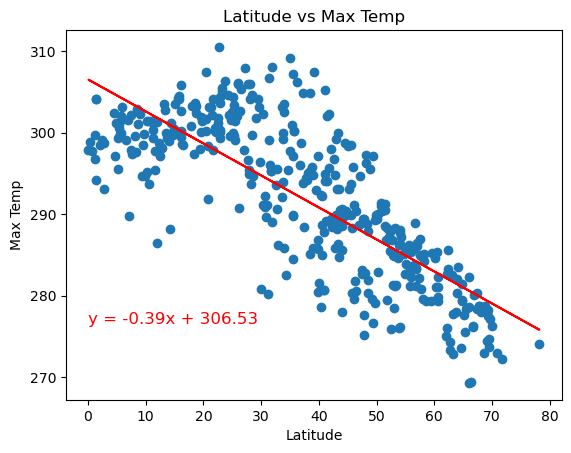

In [78]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Latitude vs Max Temp')

plt.show()


The r^2-value is: 0.66


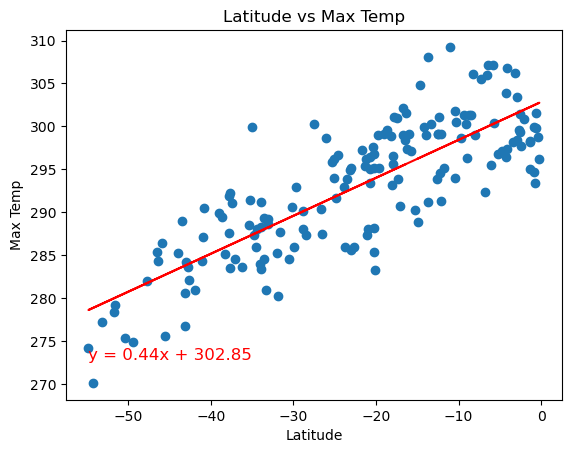

In [79]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Latitude vs Max Temp')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00


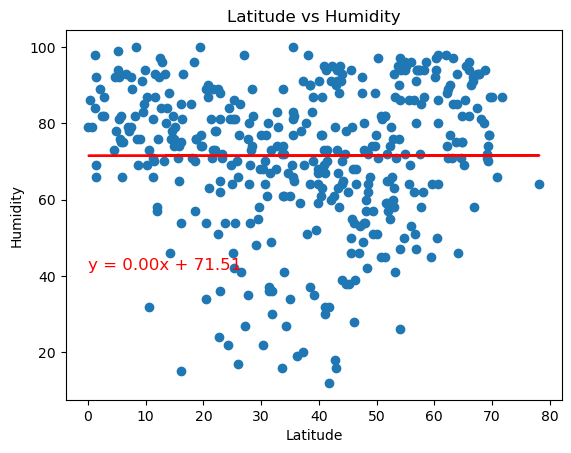

In [80]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude vs Humidity')

plt.show()

The r^2-value is: 0.00


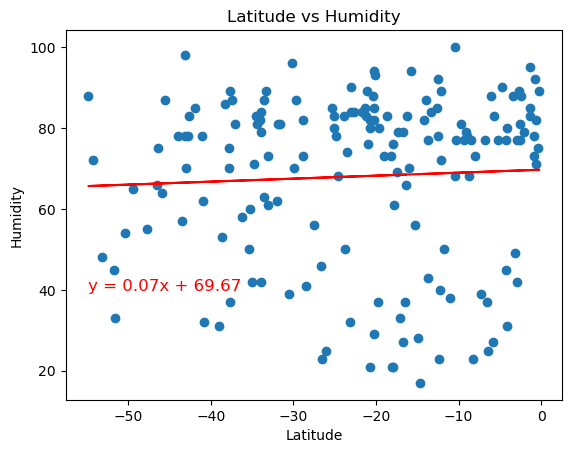

In [81]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude vs Humidity')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.00


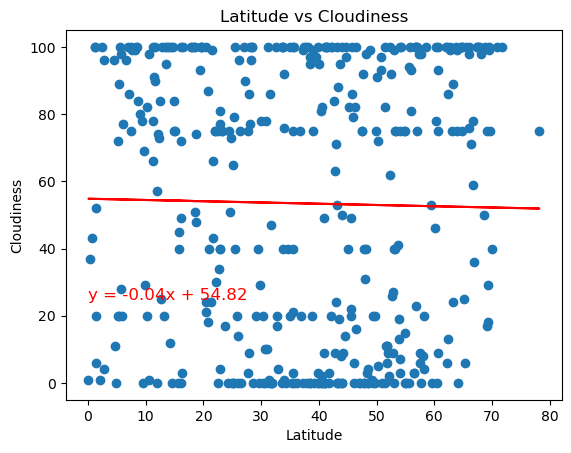

In [82]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs Cloudiness')

plt.show()

The r^2-value is: 0.00


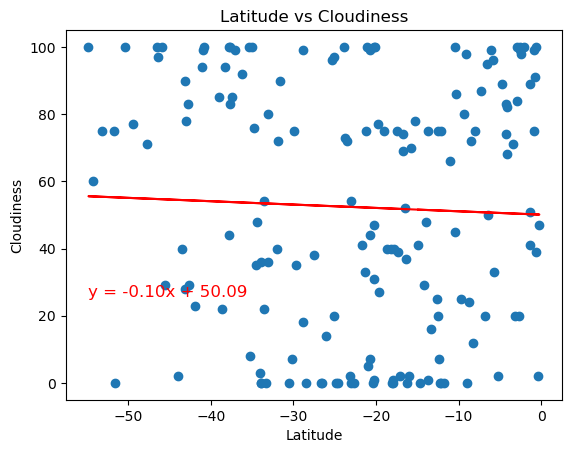

In [83]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs Cloudiness')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00


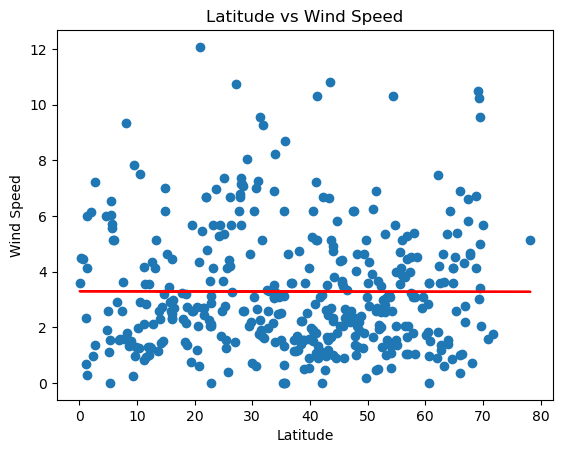

In [86]:
# Northern Hemisphere
linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude vs Wind Speed')

plt.show()

The r^2-value is: 0.04


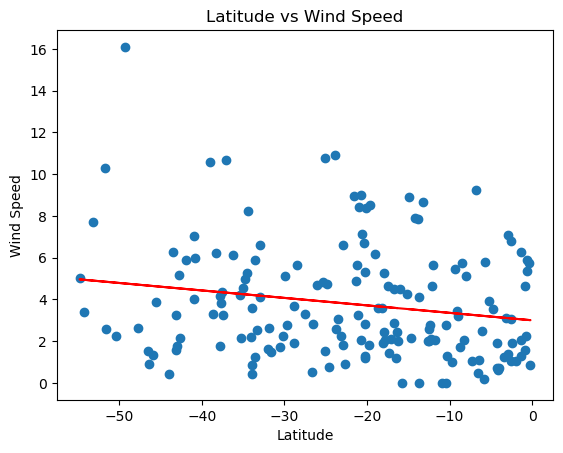

In [87]:
# Southern Hemisphere
linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude vs Wind Speed')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE